# Exercise 13

Andres Felipe Díaz Méndez - 201924178

Arvid Tenganá Hurtado - 201527819

Juan David Barreto Pérez- 202020148

Juan Felipe Martínez Ramos - 201113765

Luis Miguel Torres Aponte - 202022939

## Analyze class homeworks


In [228]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_excel('../datasets/Consolidado_respuestas_escribir_v2.xlsx')
data.head()

,ID,Genero,Carrera de pregrado,Sector en el que trabaja,Edad,E1 - Examples of Time Series Analysis,E4 - Panel Data,E6 - Decison Trees,E8 - Ensemble Trees Overview,E10 - REST-API,E12 - Natural Language Processing Overview
0,1,M,Matemáticas,Estudio de mercados,30.0,Dentro de las diferentes aplicaciones que tien...,La principal diferencia entre las series de ti...,Los arboles de decisión son herramienta de Mac...,Al proponer un método para realizar una predic...,Durante el desarrollo de soluciones dentro de ...,La empresa kore.ai se especializa en la implem...
1,2,M,NaN,NaN,NaN,NaN,una serie de tiempo se enfoca en un individio ...,NaN,NaN,Un micro servicio es una parte de la arquitect...,NaN
2,3,M,NaN,NaN,NaN,Mercados energeticos: Tras la liberación y des...,Los datos de series de tiempo son un conjunto ...,NaN,Los metodos de ensamble nos permiten mejorar e...,Los microservicios defininen una nueva metodol...,NaN
3,4,M,Estadistica,Financiero,28.0,Las series de tiempo son una colección de obse...,Los datos de series de tiempo son un conjunto ...,Un árbol de decisión es una especie de mapa en...,Los métodos de ensamble de modelos o métodos c...,Los microservicios son tanto un estilo de arqu...,La función de autocompletar las palabras en Wh...
4,5,M,NaN,NaN,NaN,"1. Actualmente, la empresa de mascotas Laika q...",Un conjunto de datos de una serie de tiempo co...,NaN,Los modelos de ensamble consisten en mezclar l...,Los microservicios son tanto un estilo de arqu...,NaN


In [229]:
data.shape

(38, 11)

In [230]:
data.columns

Index(['ID', 'Genero', 'Carrera de pregrado', 'Sector en el que trabaja',
       'Edad', 'E1 - Examples of Time Series Analysis', 'E4 - Panel Data',
       'E6 - Decison Trees', 'E8 - Ensemble Trees Overview', 'E10 - REST-API',
       'E12 - Natural Language Processing Overview'],
      dtype='object')

# Exercise 13.1

Analyze the writing patterns of each student

In [231]:
df = data.copy()
df['Ejercicios'] = df.apply( lambda x: [x[i] for i in data.columns[5:]], axis=1)
df = df.drop(columns=data.columns[5:])
df = df.explode('Ejercicios')

print(df.shape)
df = df[df.Ejercicios.notna()]
print(df.shape)

df['NumChars'] = df.Ejercicios.str.len()
df['NumWords'] = df.Ejercicios.str.split(" ").apply( lambda x: len(x))
print( df.NumWords.mean() )
print( df.NumChars.mean() )

df.head()

(228, 6)
(200, 6)
235.305
1528.145


,ID,Genero,Carrera de pregrado,Sector en el que trabaja,Edad,Ejercicios,NumChars,NumWords
0,1,M,Matemáticas,Estudio de mercados,30.0,Dentro de las diferentes aplicaciones que tien...,1900,304
0,1,M,Matemáticas,Estudio de mercados,30.0,La principal diferencia entre las series de ti...,935,152
0,1,M,Matemáticas,Estudio de mercados,30.0,Los arboles de decisión son herramienta de Mac...,1949,308
0,1,M,Matemáticas,Estudio de mercados,30.0,Al proponer un método para realizar una predic...,1989,303
0,1,M,Matemáticas,Estudio de mercados,30.0,Durante el desarrollo de soluciones dentro de ...,1913,307


In [232]:
import nltk
stopwords = nltk.corpus.stopwords.words(['english','spanish'])
df['NumStopWords'] = df['Ejercicios'].apply( lambda x: len([i for i in x.split(" ") if i in stopwords]))
df['Ejercicios'] = df['Ejercicios'].apply( lambda x: " ".join([i for i in x.split(" ") if i not in stopwords]))
df.head()

,ID,Genero,Carrera de pregrado,Sector en el que trabaja,Edad,Ejercicios,NumChars,NumWords,NumStopWords
0,1,M,Matemáticas,Estudio de mercados,30.0,Dentro diferentes aplicaciones series tiempo v...,1900,304,142
0,1,M,Matemáticas,Estudio de mercados,30.0,La principal diferencia series tiempo datos pa...,935,152,73
0,1,M,Matemáticas,Estudio de mercados,30.0,Los arboles decisión herramienta Machine learn...,1949,308,145
0,1,M,Matemáticas,Estudio de mercados,30.0,"Al proponer método realizar predicción, método...",1989,303,135
0,1,M,Matemáticas,Estudio de mercados,30.0,"Durante desarrollo soluciones dentro empresas,...",1913,307,145


In [233]:
df.groupby('Genero').agg({'NumChars':'mean','NumWords':'mean','NumStopWords':'mean'})

,NumChars,NumWords,NumStopWords
Genero,,,
F,1546.701754,241.087719,106.456140
M,1520.748252,233.000000,101.657343


In [234]:
df['Carrera de pregrado'] = (df['Carrera de pregrado'].str.upper().str.normalize("NFKD")
                             .str.encode("ASCII", errors='ignore').str.decode("UTF-8"))

carreras = {"ECONOMISTA":"ECONOMIA",
           "ING. ELECTRONICA":"INGENIERIA ELECTRONICA",
           "INGENIERA DE SISTEMAS":"INGENIERIA DE SISTEMAS",
           "INGENIERIA INDISTRIAL, ADMON NEG INTERNACIONALES":"INGENIERIA INDUSTRIAL",
           "INGENIERIA INDUSTRIAL Y ECONOMIA":"INGENIERIA INDUSTRIAL"}

df['Carrera de pregrado'] = df['Carrera de pregrado'].replace(carreras)

df.groupby('Carrera de pregrado').agg({'NumChars':'mean','NumWords':'mean','NumStopWords':'mean'})

,NumChars,NumWords,NumStopWords
Carrera de pregrado,,,
BIOLOGIA E INGENIERIA BIOMEDICA,1926.500000,294.000000,121.333333
ECONOMIA,1987.941176,299.235294,130.176471
ESTADISTICA,1411.242424,216.727273,93.636364
FINANZAS,992.000000,151.000000,64.400000
INGENIERIA DE SISTEMAS,1574.764706,236.470588,102.529412
INGENIERIA ELECTRONICA,1619.928571,244.285714,102.785714
INGENIERIA INDUSTRIAL,1683.901961,263.156863,117.509804
MATEMATICAS,1535.166667,242.166667,113.500000


In [235]:
df.groupby('Edad').agg({'NumChars':'mean','NumWords':'mean','NumStopWords':'mean'})

,NumChars,NumWords,NumStopWords
Edad,,,
25.0,1230.294118,186.705882,78.352941
26.0,1889.916667,295.750000,133.583333
27.0,594.500000,95.500000,42.500000
28.0,1388.166667,210.750000,92.333333
29.0,1514.818182,239.727273,111.272727
30.0,1558.107143,243.142857,107.035714
31.0,1436.888889,225.555556,99.666667
33.0,1196.909091,188.090909,84.363636
34.0,1484.800000,227.400000,99.600000


In [236]:
df.groupby('ID').agg({'NumWords':['mean','std','min','max'],
                      'NumStopWords':['mean','std','min','max']})

NumWords                        NumStopWords                      
          mean         std  min   max         mean         std  min  max
ID                                                                      
1   242.166667  100.811540   79   308   113.500000   45.067727   41  145
2   164.500000  207.182287   18   311    75.500000   95.459415    8  143
3   339.000000   16.431677  326   363   148.750000   14.840822  141  171
4   245.333333  118.635015   21   332   108.500000   52.736136   10  153
5   110.500000   15.673757   87   119    47.250000   10.781929   33   57
6   225.800000   34.281190  178   264    95.800000   16.006249   72  111
7   138.800000   88.089159   18   264    61.200000   44.223297    6  129
8   240.666667   48.583262  205   296   107.333333   19.655364   95  130
9   362.000000  438.944643   90  1199   149.500000  179.602617   35  486
10  151.000000  108.265876   51   313    64.400000   53.402247   19  146
11  145.200000   48.277324   82   214    66.600000   25.095816   32  100
12  291.833333   80.712866  149   395   125.333333   40.237627   64  174
13  176.166667  110.271332   99   389    76.166667   52.105342   39  179
14  220.833333  109.605505   45   318   103.000000   54.486696   18  162
15  102.250000   20.287517   78   119    40.250000    7.804913   33   47
16  327.833333  158.424009  139   533   136.166667   66.742540   57  224
17  296.166667  105.844068  132   420   136.666667   51.748108   58  197
18  287.166667   31.473269  241   316   131.500000   20.772578  105  156
19  287.000000   72.875236  167   346   123.500000   30.742479   76  146
20  151.833333  107.672497   30   308    68.833333   48.791051   16  135
21  221.800000   98.324463  109   316    95.600000   42.565244   46  133
22   95.500000   19.091883   82   109    42.500000   12.020815   34   51
23  227.400000  179.625444   61   463    99.600000   75.018664   31  185
24  229.166667  107.809863   75   333   103.666667   50.575356   30  149
25  137.000000  109.175089   31   308    56.166667   44.897290   13  127
26  284.666667   67.021390  161   347   129.833333   33.144633   71  162
27  226.833333  139.954874   82   433    95.833333   59.125009   29  181
28  273.666667   60.032214  152   305   113.000000   21.466253   72  132
29  304.333333   60.032214  190   366   135.666667   27.317882   83  160
30  262.400000   62.696092  154   308   121.200000   32.399074   67  150
31  225.500000  101.722662   55   308   105.166667   50.929036   23  155
32  294.000000   35.008570  244   324   121.333333   17.716283  100  143
33  126.250000  108.619750   43   286    52.500000   37.616486   21  107
34  324.200000   52.931087  278   415   147.200000   24.097718  122  187
35  129.600000  149.997667   26   392    54.800000   65.346767   11  169
36  176.333333   88.818166   51   302    72.500000   35.195170   25  113
37  267.333333   83.255430  151   341   116.000000   37.523326   66  149
38  355.500000  106.691612  188   474   154.833333   40.592692   96  204

In [237]:
from collections import Counter
df.groupby('ID').agg({'Ejercicios': lambda x: Counter([i for i in " ".join(x).split(" ") if i]).most_common(1)})

,Ejercicios
ID,
1,"[(diferentes, 26)]"
2,"[(manera, 7)]"
3,"[(datos, 24)]"
4,"[(datos, 11)]"
5,"[(tiempo, 7)]"
6,"[(datos, 9)]"
7,"[(datos, 7)]"
8,"[(tiempo, 7)]"
9,"[(lenguaje, 21)]"


In [238]:
df_stats= df.groupby('ID').agg({'NumWords':['mean','std','min','max'],'NumStopWords':['mean','std','min','max']})
df_con_stats = df.set_index('ID').join(df_stats)
df_con_stats.head()

/Users/jmartinez/opt/anaconda3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


,Genero,Carrera de pregrado,Sector en el que trabaja,Edad,Ejercicios,NumChars,NumWords,NumStopWords,"(NumWords, mean)","(NumWords, std)","(NumWords, min)","(NumWords, max)","(NumStopWords, mean)","(NumStopWords, std)","(NumStopWords, min)","(NumStopWords, max)"
ID,,,,,,,,,,,,,,,,
1,M,MATEMATICAS,Estudio de mercados,30.0,Dentro diferentes aplicaciones series tiempo v...,1900,304,142,242.166667,100.81154,79,308,113.5,45.067727,41,145
1,M,MATEMATICAS,Estudio de mercados,30.0,La principal diferencia series tiempo datos pa...,935,152,73,242.166667,100.81154,79,308,113.5,45.067727,41,145
1,M,MATEMATICAS,Estudio de mercados,30.0,Los arboles decisión herramienta Machine learn...,1949,308,145,242.166667,100.81154,79,308,113.5,45.067727,41,145
1,M,MATEMATICAS,Estudio de mercados,30.0,"Al proponer método realizar predicción, método...",1989,303,135,242.166667,100.81154,79,308,113.5,45.067727,41,145
1,M,MATEMATICAS,Estudio de mercados,30.0,"Durante desarrollo soluciones dentro empresas,...",1913,307,145,242.166667,100.81154,79,308,113.5,45.067727,41,145


# Exercise 13.2

Create a classifier to predict the gender of each student

In [249]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [240]:
df['Carrera de pregrado'] = df['Carrera de pregrado'].astype('category')
df['Sector en el que trabaja'] = df['Sector en el que trabaja'].astype('category')
df['Genero'] = df['Genero'].astype('category')
df = df.reset_index()

X = df.drop( columns = 'Genero' )
y = df.Genero

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [241]:
text_features = 'Ejercicios'
text_transformer = Pipeline(steps=[('vectorizer', CountVectorizer())])

numeric_features = ['NumChars','NumWords','NumStopWords']
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

cat_features = ['Carrera de pregrado','Sector en el que trabaja']
cat_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', cat_transformer, cat_features),
        ('txt', text_transformer, text_features)], remainder='passthrough', sparse_threshold = 0 )

clf = Pipeline([('preprocessor', preprocessor ),
               ('classifier', LGBMClassifier(random_seed=42))])

In [242]:
clf.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['NumChars', 'NumWords',
                                                   'NumStopWords']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Carrera de pregrado',
                                                   'Sector en el que trabaja']),
                                                 ('txt',
                                                  Pipeline(steps=[('vectorizer',
                                                                   CountVectorize

In [243]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.8250


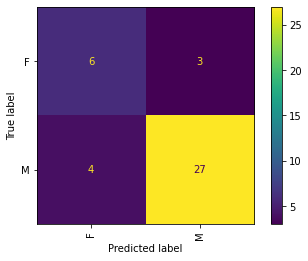

In [244]:
plot_confusion_matrix(clf, X_test, y_test, xticks_rotation='vertical')

# Exercise 13.3

Create a classifier to predict the industry in which each student works

In [245]:
df = df[df['Sector en el que trabaja'].notna()]

X = df.drop( columns = 'Sector en el que trabaja' )
y = df['Sector en el que trabaja']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [246]:
text_features = 'Ejercicios'
text_transformer = Pipeline(steps=[('vectorizer', CountVectorizer())])

numeric_features = ['NumChars','NumWords','NumStopWords']
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

cat_features = ['Carrera de pregrado','Genero']
cat_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', cat_transformer, cat_features),
        ('txt', text_transformer, text_features)], remainder='passthrough', sparse_threshold = 0 )

clf = Pipeline([('preprocessor', preprocessor ),
               ('classifier', LGBMClassifier(random_seed=42))])

In [247]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.8667


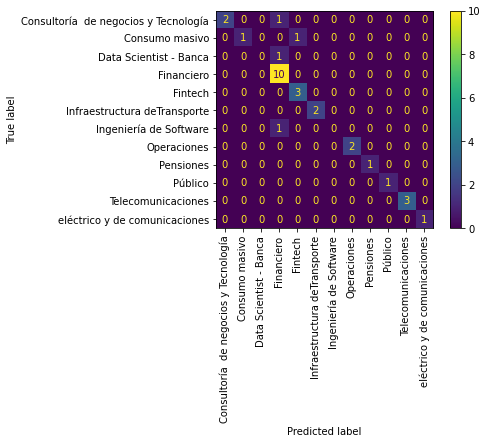

In [248]:
plot_confusion_matrix(clf, X_test, y_test, xticks_rotation='vertical')